<a href="https://colab.research.google.com/github/sanjid-007/ML-Lab-Final/blob/main/Task_1_pneumonia_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [27]:
train_path = '/content/drive/MyDrive/ML-DATASET/Archive/train'
validation_path = '/content/drive/MyDrive/ML-DATASET/Archive/val'
test_path = '/content/drive/MyDrive/ML-DATASET/Archive/test'

In [28]:
img_size = (150, 150)
input_shape = (img_size[0], img_size[1], 3)

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size=img_size,
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

Found 5241 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [31]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
batch_size = 10

total_train_samples =  train_generator.samples
steps_per_epoch = max(1, total_train_samples // batch_size)
print("Current steps_per_epoch:", steps_per_epoch)

model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    steps_per_epoch=steps_per_epoch,
    verbose=1
)

Current steps_per_epoch: 524
Epoch 1/5
164/524 [========>.....................] - ETA: 12:37 - loss: 0.2335 - accuracy: 0.9044

524/524 [==============================] - 348s 657ms/step - loss: 0.2335 - accuracy: 0.9044 - val_loss: 0.3906 - val_accuracy: 0.9375


In [34]:

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples)
print(f'Test Accuracy: {test_acc}')

624/624 [==============================] - 74s 118ms/step - loss: 0.4595 - accuracy: 0.8365
Test Accuracy: 0.8365384340286255


In [35]:
predictions = model.predict(test_generator, steps=test_generator.samples)

624/624 [==============================] - 19s 30ms/step


In [38]:
print(f'Prediction for the first image: {predictions[0]}')

Prediction for the first image: [0.11360998]


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [41]:
img_path = '/content/drive/MyDrive/ML-DATASET/Archive/test/PNEUMONIA/person100_bacteria_475.jpeg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

In [42]:
prediction = model.predict(img_array)

1/1 [==============================] - 0s 104ms/step


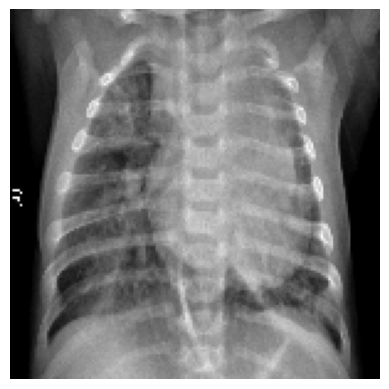

In [43]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [44]:
if prediction[0] > 0.5:
    print("Prediction: Pneumonia")
else:
    print("Prediction: Normal")

Prediction: Pneumonia


In [46]:
import os

In [47]:
normal_folder_path = '/content/drive/MyDrive/ML-DATASET/Archive/test/NORMAL'

In [48]:
normal_images = [os.path.join(normal_folder_path, img) for img in os.listdir(normal_folder_path)[:20]]

1/1 [==============================] - 0s 92ms/step


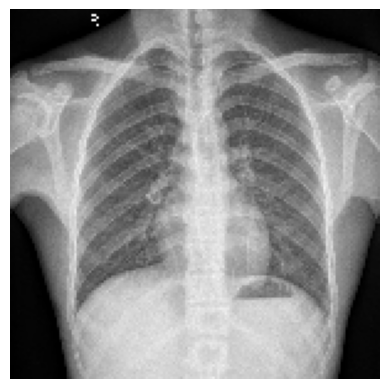

Prediction: Normal (Confidence: 0.98)
1/1 [==============================] - 0s 62ms/step


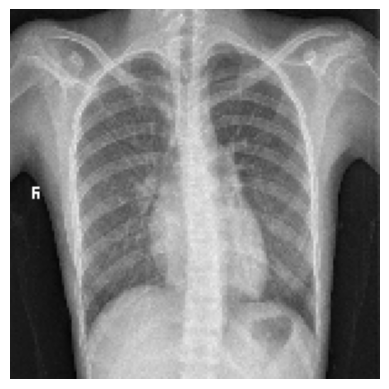

Prediction: Pneumonia (Confidence: 0.71)
1/1 [==============================] - 0s 111ms/step


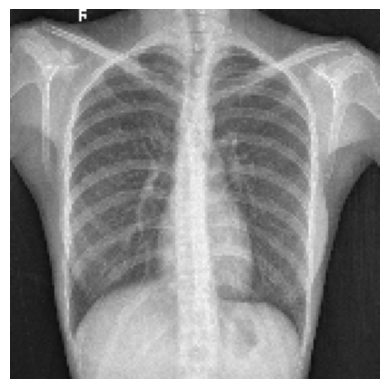

Prediction: Normal (Confidence: 0.78)
1/1 [==============================] - 0s 55ms/step


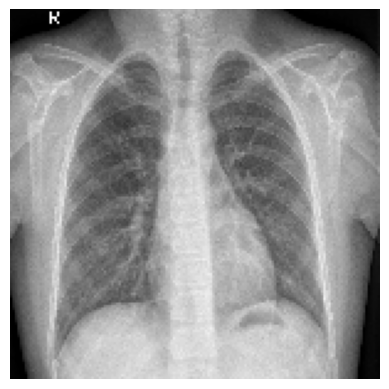

Prediction: Normal (Confidence: 0.64)
1/1 [==============================] - 0s 128ms/step


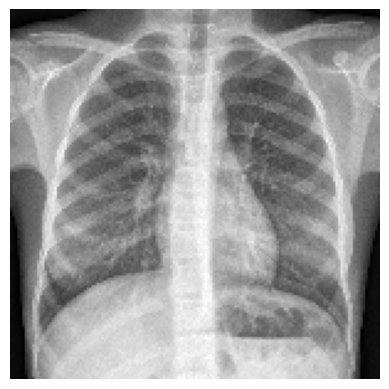

Prediction: Normal (Confidence: 0.63)
1/1 [==============================] - 0s 127ms/step


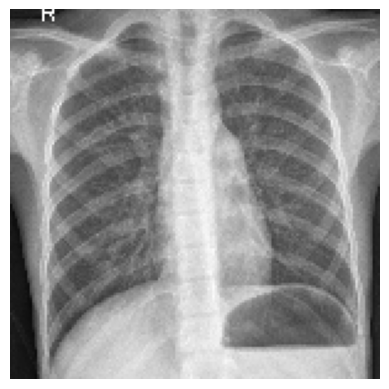

Prediction: Pneumonia (Confidence: 0.91)
1/1 [==============================] - 0s 52ms/step


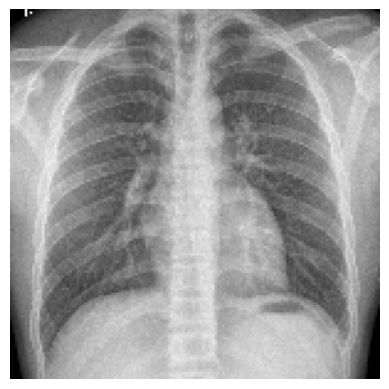

Prediction: Normal (Confidence: 0.86)
1/1 [==============================] - 0s 57ms/step


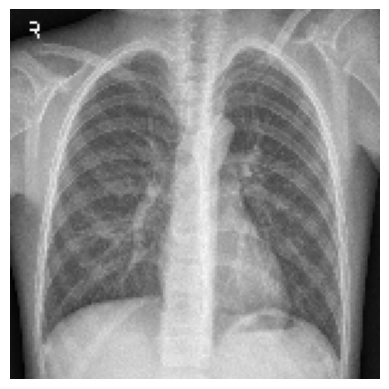

Prediction: Pneumonia (Confidence: 0.80)
1/1 [==============================] - 0s 98ms/step


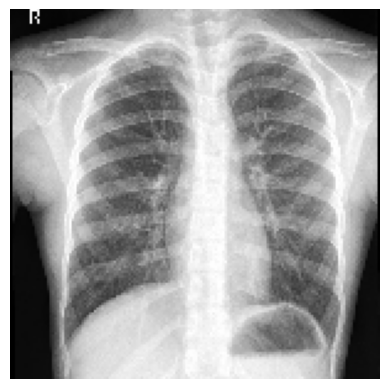

Prediction: Pneumonia (Confidence: 0.70)
1/1 [==============================] - 0s 66ms/step


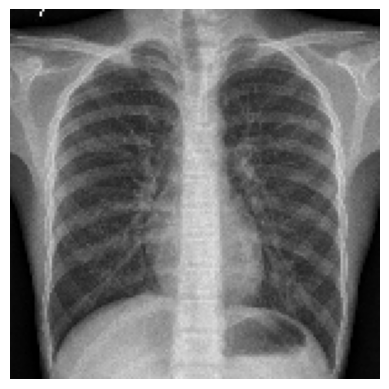

Prediction: Pneumonia (Confidence: 0.54)
1/1 [==============================] - 0s 101ms/step


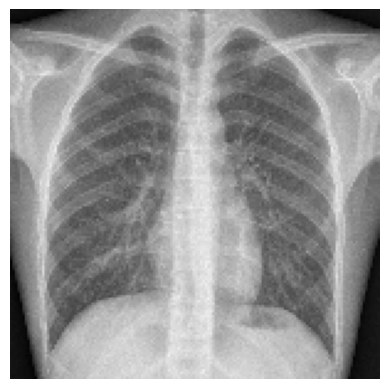

Prediction: Pneumonia (Confidence: 0.61)
1/1 [==============================] - 0s 91ms/step


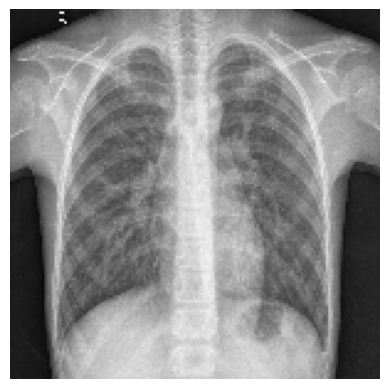

Prediction: Pneumonia (Confidence: 0.61)
1/1 [==============================] - 0s 177ms/step


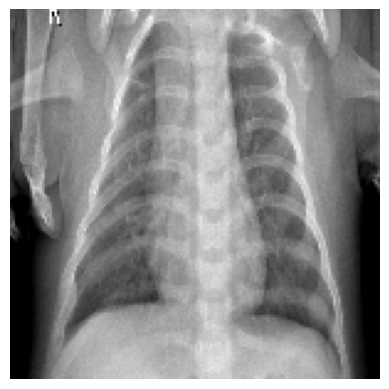

Prediction: Pneumonia (Confidence: 0.85)
1/1 [==============================] - 0s 88ms/step


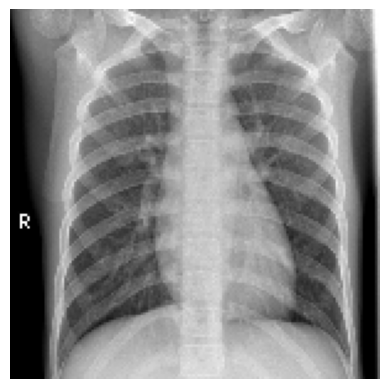

Prediction: Normal (Confidence: 0.75)
1/1 [==============================] - 0s 52ms/step


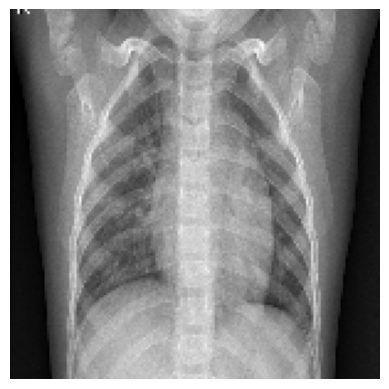

Prediction: Normal (Confidence: 0.89)
1/1 [==============================] - 0s 55ms/step


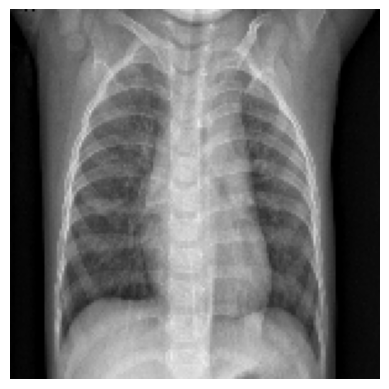

Prediction: Normal (Confidence: 0.62)
1/1 [==============================] - 0s 79ms/step


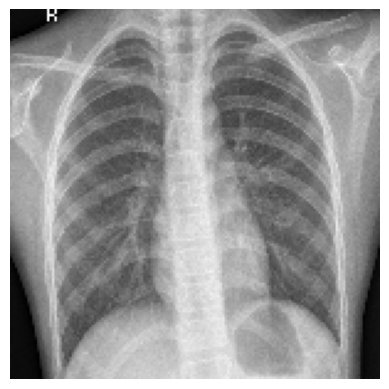

Prediction: Pneumonia (Confidence: 0.73)
1/1 [==============================] - 0s 69ms/step


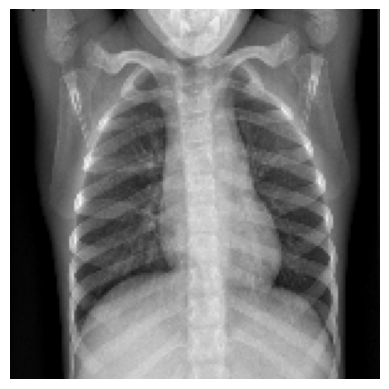

Prediction: Normal (Confidence: 0.97)
1/1 [==============================] - 0s 53ms/step


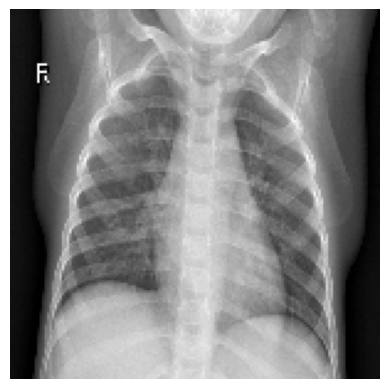

Prediction: Normal (Confidence: 0.87)
1/1 [==============================] - 0s 73ms/step


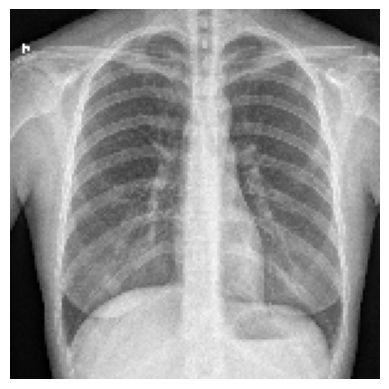

Prediction: Pneumonia (Confidence: 0.68)


In [49]:
for img_path in normal_images:
    #Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    #Make predictions
    prediction = model.predict(img_array)

    #Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    #Display the prediction result
    if prediction[0] > 0.5:
        print(f"Prediction: Pneumonia (Confidence: {prediction[0][0]:.2f})")
    else:
        print(f"Prediction: Normal (Confidence: {1 - prediction[0][0]:.2f})")